In [ ]:
!pip install augly

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/24.3 MB ? eta -:--:--
   - -------------------------------------- 0.8/24.3 MB 6.2 MB/s eta 0:00:04
   --- ------------------------------------ 2.1/24.3 MB 6.7 MB/s eta 0:00:04
   ------ --------------------------------- 3.7/24.3 MB 6.8 MB/s eta 0:00:04
   --------- ------------------------------ 5.5/24.3 MB 7.4 MB/s eta 0:00:03
   ------------ --------------------------- 7.6/24.3 MB 7.8 MB/s eta 0:00:03
   --------------- ------------------------ 9.2/24.3 MB 8.2 MB/s eta 0:00:02
   --------------- ------------------------ 9.4/24.3 MB 6.7 MB/s eta 0:00:03
   ------------------- -------------------- 12.1/24.3 MB 7.5 MB/s eta 0:00:02
   -------------------- ------------------- 12.6/24.3 MB 7.7 MB/s eta 0:00:02
   ------------------------ --------------- 14.9/24.3 M


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\harin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
'rm' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
# Imports
import kagglehub
import shutil
import os
from PIL import Image

In [8]:
# Dataset download
path = kagglehub.dataset_download("samuelcortinhas/cats-and-dogs-image-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\harin\.cache\kagglehub\datasets\samuelcortinhas\cats-and-dogs-image-classification\versions\4


In [2]:
# Collecting the test dataset

path = "C:/Users/harin/.cache/kagglehub/datasets/samuelcortinhas/cats-and-dogs-image-classification/versions/4"
shutil.copytree(os.path.join(path, "test"), "test")
shutil.copytree(os.path.join(path, "train"), "train")


'train'

In [3]:
# Creating a dataset object by combining the images and adding labels

path_c = os.path.join("train", "cats")
path_d = os.path.join("train", "dogs")

images_tr = []
for file in os.listdir(path_c):
    images_tr.append(Image.open(os.path.join(path_c, file)))

for file in os.listdir(path_d):
    images_tr.append(Image.open(os.path.join(path_d, file)))

labels = [1] * len(os.listdir(path_c)) + [0] * len(os.listdir(path_d))

dataset = list(zip(images_tr, labels))

print(dataset[0])

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2000x1333 at 0x1D226F0ECF0>, 1)


In [4]:
# Creating a dataset object by combining the images and adding labels

path_c = os.path.join("test", "cats")
path_d = os.path.join("test", "dogs")

images_t = []
for file in os.listdir(path_c):
    images_t.append(Image.open(os.path.join(path_c, file)))

for file in os.listdir(path_d):
    images_t.append(Image.open(os.path.join(path_d, file)))

labels_t = [1] * len(os.listdir(path_c)) + [0] * len(os.listdir(path_d))

dataset_t = list(zip(images_t, labels_t))

print(dataset_t[0])

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=615x769 at 0x1D22722F820>, 1)


In [5]:
# Getting the final Train and Test datasets

X_train = images_tr
y_train =  labels
X_test = images_t   
y_test = labels_t

In [6]:
# Random Shuffle
import random

random.seed(42)

train = list(zip(X_train, y_train))
test = list(zip(X_test, y_test))

random.shuffle(train)
random.shuffle(test)

X_train, y_train = zip(*train)
X_test, y_test = zip(*test)

In [7]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

557 557 140 140


In [8]:
print(X_test[0], y_test[0])
print(X_train[0], y_train[0])

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1200x1200 at 0x1D22727E060> 1
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2400x1200 at 0x1D22712C050> 1


In [9]:
# Augmentations
import augly.image as imaugs

augmentations = [
    imaugs.HFlip(),
    imaugs.VFlip(),
    imaugs.Rotate(degrees=45),
    imaugs.Brightness(factor=1.2),
    imaugs.Contrast(factor=1.2),
    imaugs.Saturation(factor=1.2),
    imaugs.Blur(radius=2.0),
    imaugs.Sharpen(),
    imaugs.Opacity(),
    imaugs.Grayscale(),
    imaugs.RandomBlur(),
    imaugs.RandomNoise(),
]

In [10]:
# Labels

aug_labels = ["HFlip", "VFlip", "Rotate", "Brightness", "Contrast", "Saturation", "Blur", "Sharpen", "Opacity", "Grayscale", "RandomBlur", "RandomNoise"]

In [11]:
# Function to return two augmentations for each image

def augment(image):
    augmented_images = []
    augmented_labels = []
    for i in range(2):
        im = image.copy()
        aug= random.sample(aug_labels,3)
        print(i+1,  aug)
        augmented_labels.append([aug_labels.index(i) for i in aug])
        
        for a in aug:
            im = augmentations[aug_labels.index(a)](im)
        augmented_images.append(im)
    return augmented_images, augmented_labels



In [12]:
aug_im, aug_l = augment(X_train[0])

1 ['Sharpen', 'Rotate', 'HFlip']
2 ['Saturation', 'Blur', 'Contrast']


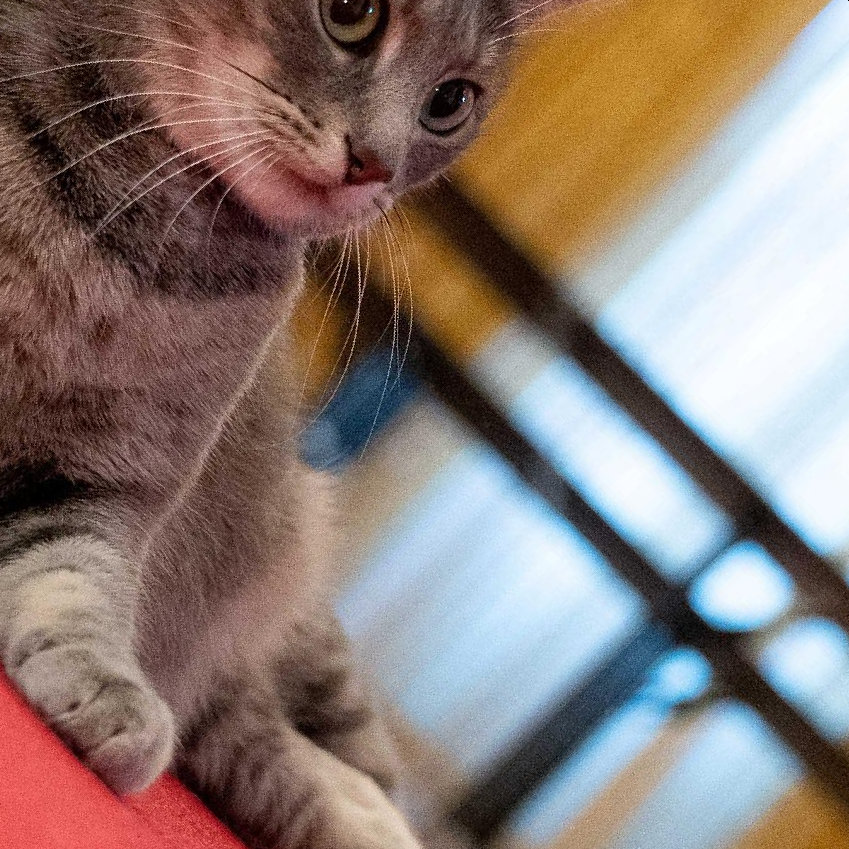

In [13]:
aug_im[0]

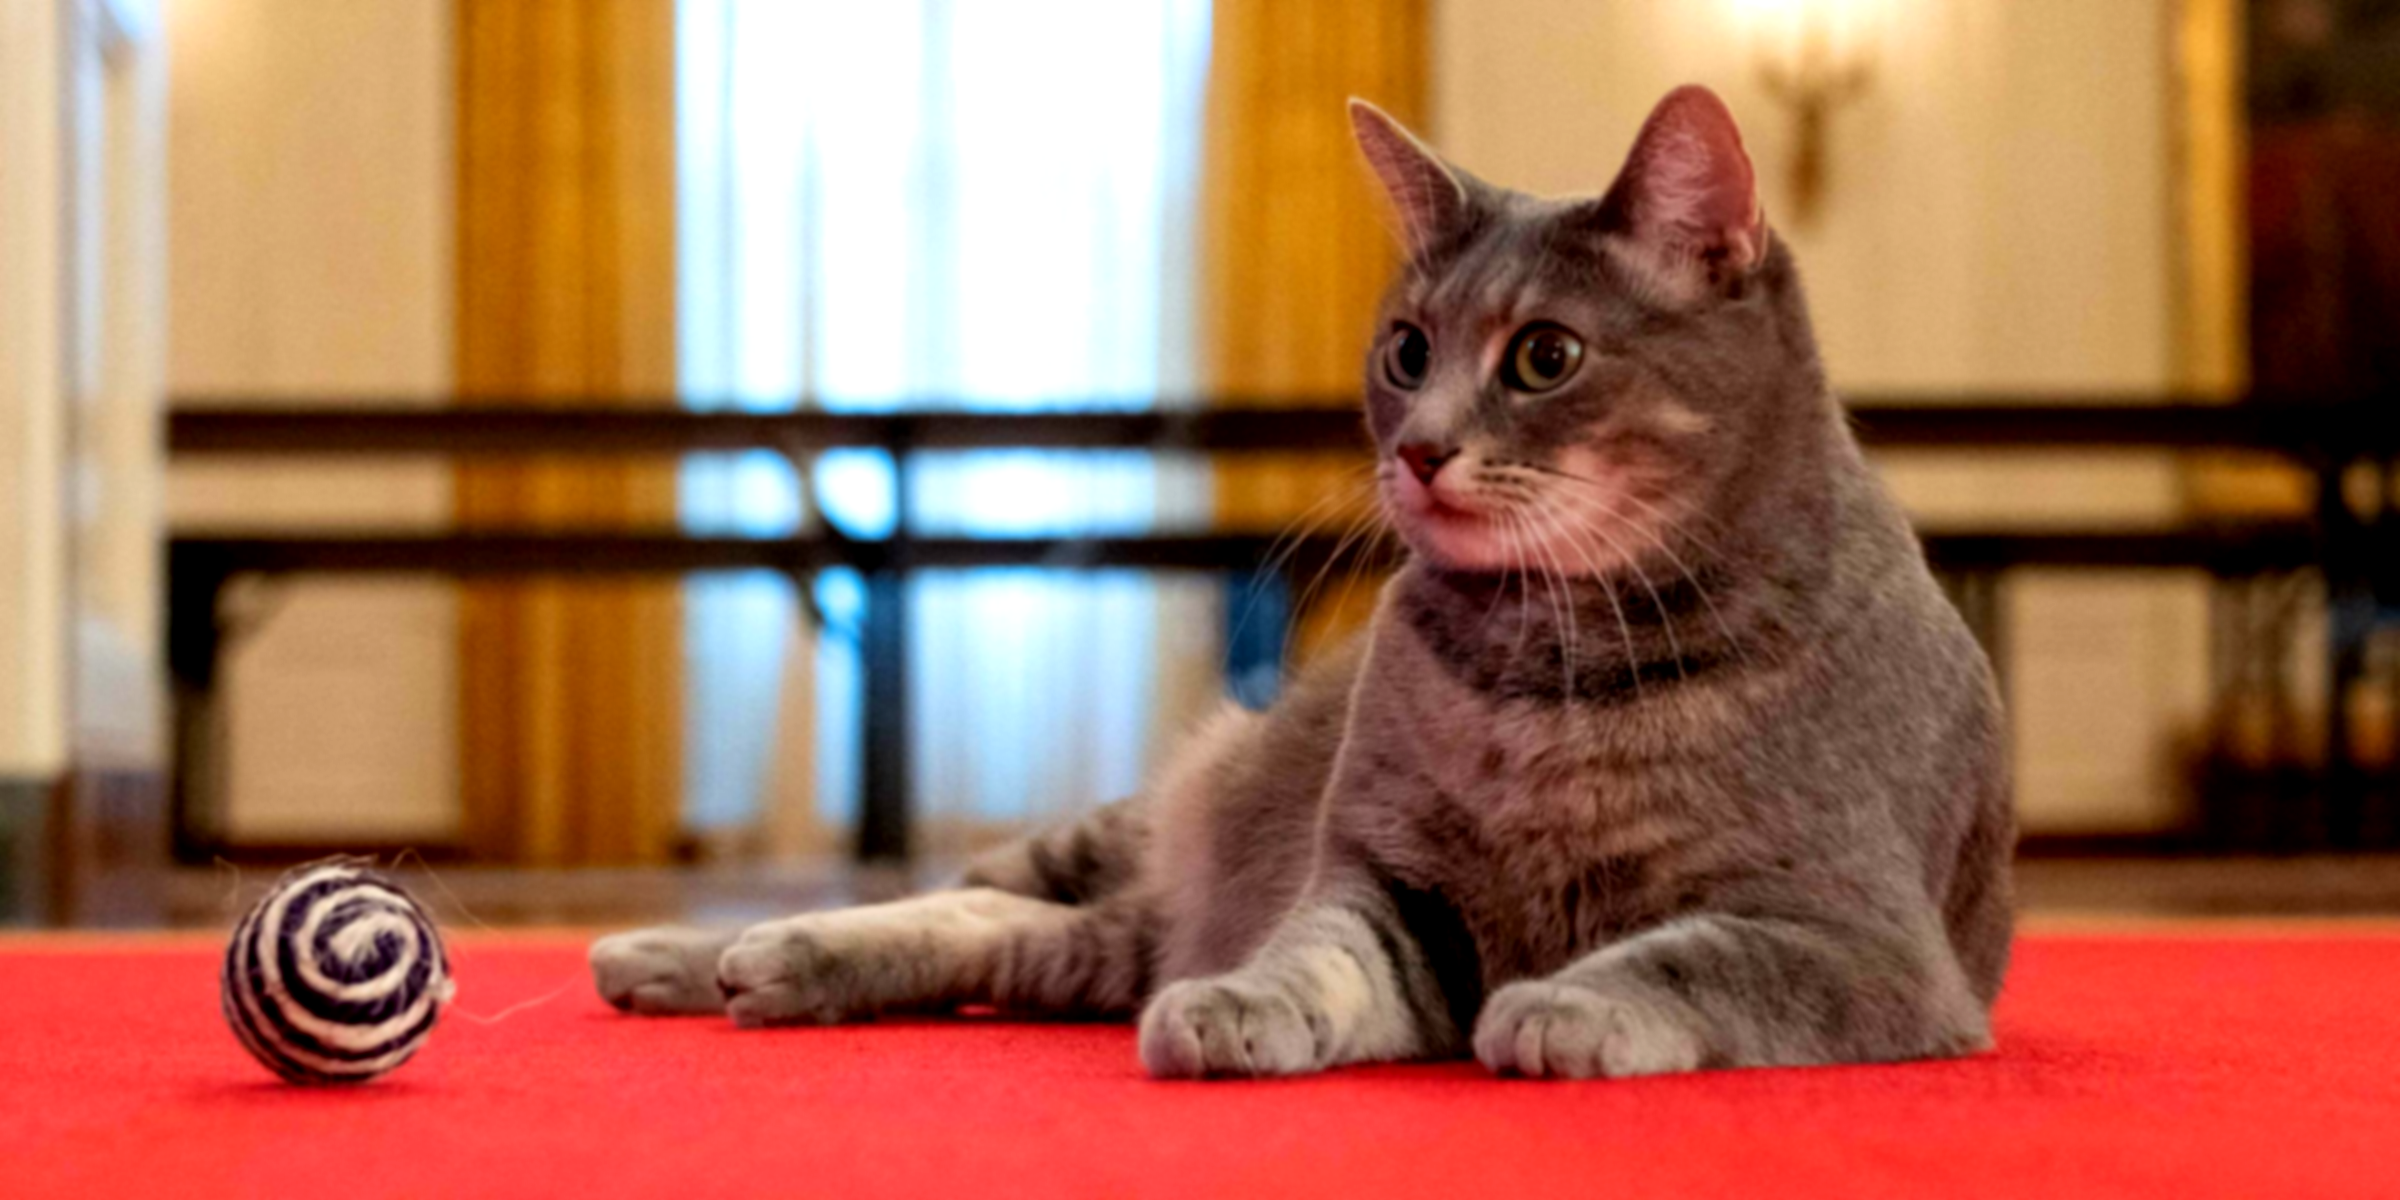

In [14]:
aug_im[1]

In [15]:
# Augmenting the entire dataset

augmented_images = list(X_train)
augmented_labels = list(y_train)

for i in range(len(X_train)):
    im = X_train[i]
    aug_im, aug_l = augment(im)
    augmented_images.extend(aug_im)
    augmented_labels.extend([y_train[i]] * 2)

1 ['VFlip', 'Sharpen', 'HFlip']
2 ['Brightness', 'RandomBlur', 'VFlip']
1 ['Brightness', 'HFlip', 'Grayscale']
2 ['Grayscale', 'Brightness', 'Sharpen']
1 ['Grayscale', 'VFlip', 'Rotate']
2 ['Contrast', 'Grayscale', 'Blur']
1 ['RandomNoise', 'RandomBlur', 'Brightness']
2 ['VFlip', 'Grayscale', 'HFlip']
1 ['Opacity', 'RandomBlur', 'Saturation']
2 ['Saturation', 'RandomBlur', 'Sharpen']
1 ['Contrast', 'Grayscale', 'Opacity']
2 ['Grayscale', 'Contrast', 'Saturation']
1 ['Sharpen', 'Brightness', 'RandomNoise']
2 ['Sharpen', 'Saturation', 'Rotate']
1 ['Contrast', 'Grayscale', 'RandomNoise']
2 ['Brightness', 'Blur', 'Sharpen']
1 ['RandomNoise', 'Sharpen', 'RandomBlur']
2 ['Contrast', 'RandomBlur', 'Grayscale']
1 ['Opacity', 'Saturation', 'RandomBlur']
2 ['Brightness', 'Saturation', 'VFlip']
1 ['Brightness', 'RandomNoise', 'Sharpen']
2 ['Grayscale', 'Contrast', 'VFlip']
1 ['Contrast', 'HFlip', 'Opacity']
2 ['Contrast', 'Rotate', 'Sharpen']
1 ['Sharpen', 'RandomNoise', 'Saturation']
2 ['Sharpen

In [16]:
# Dataset comparison

print(len(X_train), len(augmented_images))
print(len(y_train), len(augmented_labels))
print(len(X_test), len(y_test))



557 1671
557 1671
140 140


<BarContainer object of 2 artists>

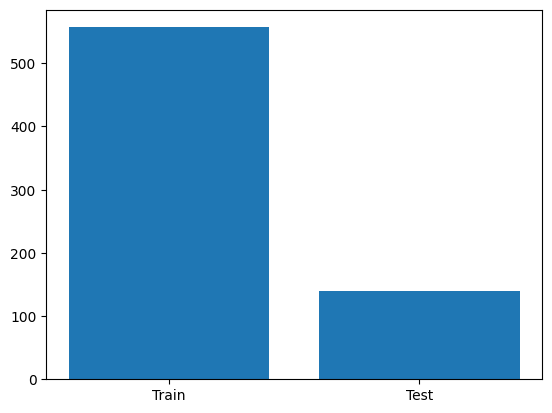

In [42]:
# Plots for comparison
import matplotlib.pyplot as plt

X_axis = ["Train", "Test"]
Y_axis = [len(X_train), len(X_test)]
plt.bar(X_axis, Y_axis)


<BarContainer object of 2 artists>

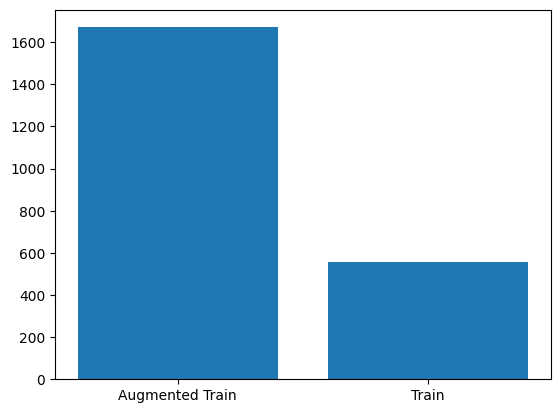

In [43]:
# Augmented vs Non-augmented

X_axis = ["Augmented Train", "Train"]
Y_axis = [len(augmented_images), len(X_train)]
plt.bar(X_axis, Y_axis)

<BarContainer object of 6 artists>

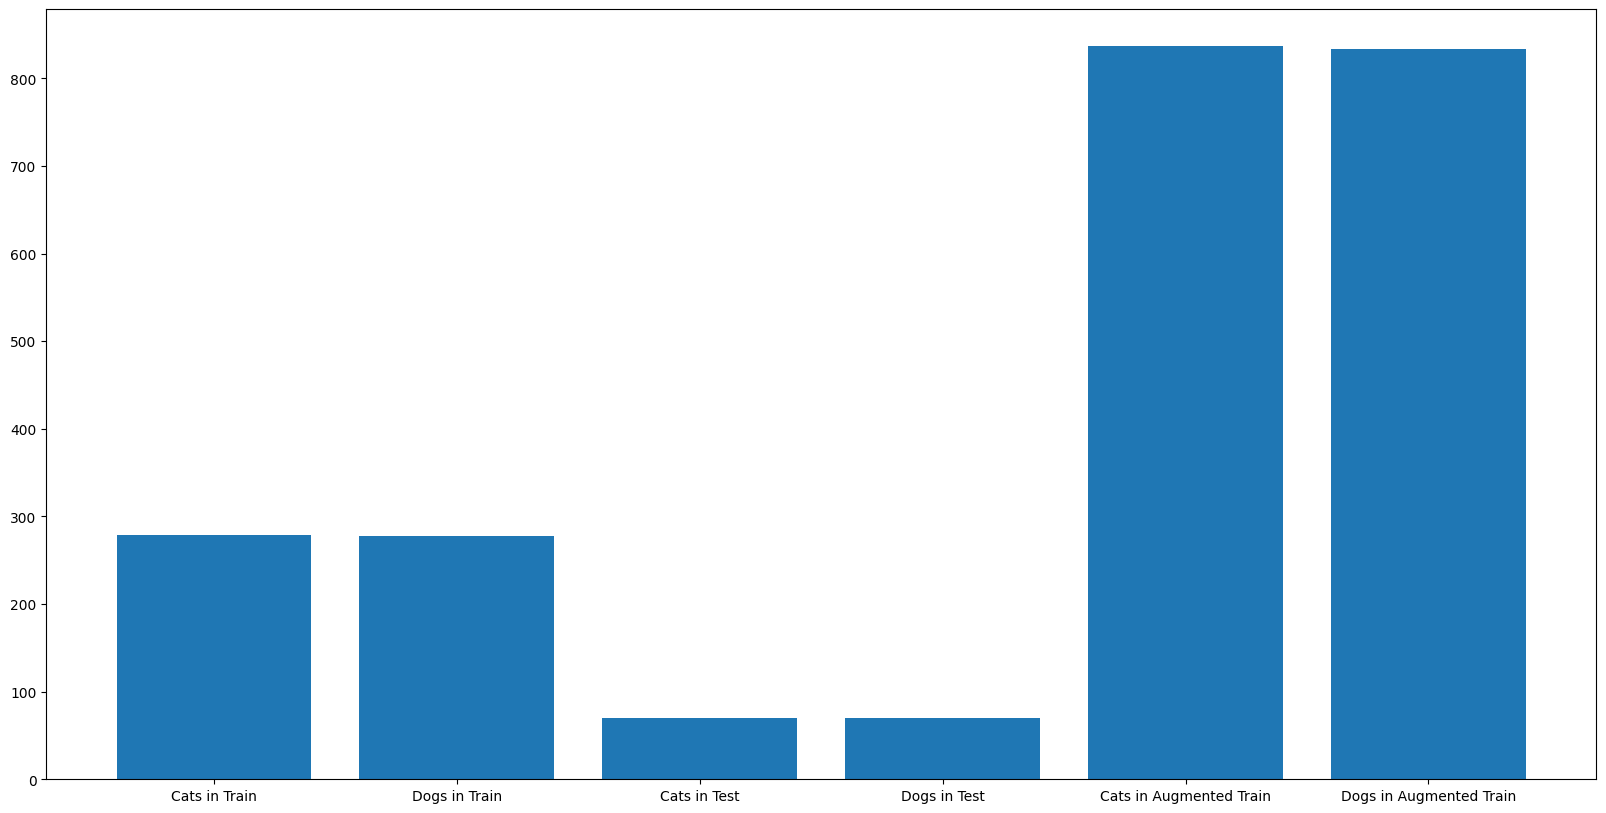

In [45]:
# Number of cats and dogs in the dataset

X_axis = ["Cats in Train", "Dogs in Train", "Cats in Test", "Dogs in Test", "Cats in Augmented Train", "Dogs in Augmented Train"]
Y_axis = [y_train.count(1), y_train.count(0), y_test.count(1), y_test.count(0), augmented_labels.count(1), augmented_labels.count(0)]

plt.figure(figsize=(20, 10))
plt.bar(X_axis, Y_axis)

In [18]:
# Saving the datasets

os.mkdir("Train_")
os.mkdir("Train_/cats")
os.mkdir("Train_/dogs")

os.mkdir("Test_")
os.mkdir("Test_/cats")
os.mkdir("Test_/dogs")

os.mkdir("Augmented")
os.mkdir("Augmented/cats")
os.mkdir("Augmented/dogs")

for i in range(len(y_train)):
    if y_train[i] == 1:
        augmented_images[i].save(f"Train_/cats/{i}.jpg")
    else:
        augmented_images[i].save(f"Train_/dogs/{i}.jpg")

for i in range(len(y_test)):
    if y_test[i] == 1:
        X_test[i].save(f"Test_/cats/{i}.jpg")
    else:
        X_test[i].save(f"Test_/dogs/{i}.jpg")

for i in range(len(augmented_labels)):
    if augmented_labels[i] == 1:
        augmented_images[i].save(f"Augmented/cats/{i}.jpg")
    else:
        augmented_images[i].save(f"Augmented/dogs/{i}.jpg")

In [19]:
# Model Training - Using resnet-50 model

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torchvision.models import resnet50
from torch.utils.data import DataLoader


from transformers import ResNetForImageClassification, ResNetConfig



In [20]:
resnet50

<function torchvision.models.resnet.resnet50(*, weights: Optional[torchvision.models.resnet.ResNet50_Weights] = None, progress: bool = True, **kwargs: Any) -> torchvision.models.resnet.ResNet>

In [21]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [22]:
# Transformations required for resnet model

torchvision.models.resnet
t = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
    ])



In [25]:
# Loading the datasets with required transforms
train_data = torchvision.datasets.ImageFolder("Train", transform = t)
test_data = torchvision.datasets.ImageFolder("Test_", transform = t)
augmented_data = torchvision.datasets.ImageFolder("Augmented", transform = t)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=22)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False, num_workers=22)
augmented_loader = DataLoader(augmented_data, batch_size=32, shuffle=True, num_workers=22)


In [26]:
# Initializing weights

def weights(w):
    if isinstance(w, nn.Linear):
        torch.nn.init.xavier_uniform_(w.weight.to(dev))
        w.bias.data.fill_(0.01)

In [27]:
# Configuration for Model

config = ResNetConfig.from_pretrained("microsoft/resnet-50", num_labels=2)
model = ResNetForImageClassification(config)
model.apply(weights)
model.to(dev)

loss = nn.CrossEntropyLoss()
op = optim.Adam(model.parameters(), lr=0.001)

In [28]:
dev

device(type='cpu')

In [29]:
model.config

ResNetConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "ResNetForImageClassification"
  ],
  "depths": [
    3,
    4,
    6,
    3
  ],
  "downsample_in_bottleneck": false,
  "downsample_in_first_stage": false,
  "embedding_size": 64,
  "hidden_act": "relu",
  "hidden_sizes": [
    256,
    512,
    1024,
    2048
  ],
  "layer_type": "bottleneck",
  "model_type": "resnet",
  "num_channels": 3,
  "out_features": [
    "stage4"
  ],
  "out_indices": [
    4
  ],
  "stage_names": [
    "stem",
    "stage1",
    "stage2",
    "stage3",
    "stage4"
  ],
  "torch_dtype": "float32",
  "transformers_version": "4.48.3"
}

In [30]:
 # Running the model for original dataset for 10 epochs

for epoch in range(10):
    model.train()
    t_loss = 0.0

    for i, l in train_loader:
        i, l = i.to(dev), l.to(dev)
        op.zero_grad()

        o = model(i).logits
        loss_ = loss(o, l)
        loss_.backward()

        op.step()

        t_loss += loss_.item() / len(train_loader)
    
    print(f"Epoch: {epoch+1}, Loss: {t_loss}")


Epoch: 1, Loss: 1.6971748140123153
Epoch: 2, Loss: 0.9368904332319894
Epoch: 3, Loss: 0.9193488359451294
Epoch: 4, Loss: 0.6960329512755077
Epoch: 5, Loss: 0.668249731262525
Epoch: 6, Loss: 0.6771960208813349
Epoch: 7, Loss: 0.6514289925495783
Epoch: 8, Loss: 0.8064823680453831
Epoch: 9, Loss: 0.6179905898041197
Epoch: 10, Loss: 0.4663546424773004


In [31]:
# Evaluation

model.eval()
acc = 0

labels_e = []
pred_e = []

with torch.no_grad():
    for i, l in test_loader:
        i, l = i.to(dev), l.to(dev)
        o = model(i).logits
        
        _, pred = torch.max(o, 1)
        acc += torch.sum(pred == l).item()


        labels_e.extend(l.cpu().numpy())
        pred_e.extend(pred.cpu().numpy())

print(f"Accuracy: {acc/len(test_data)}")

Accuracy: 0.5857142857142857


In [32]:
# Metrics for original train dataset
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

accuracy = accuracy_score(labels_e, pred_e)
precision = precision_score(labels_e, pred_e)
recall = recall_score(labels_e, pred_e)
f1 = f1_score(labels_e, pred_e)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.5857142857142857
Precision: 0.5769230769230769
Recall: 0.6428571428571429
F1 Score: 0.6081081081081081


<Axes: >

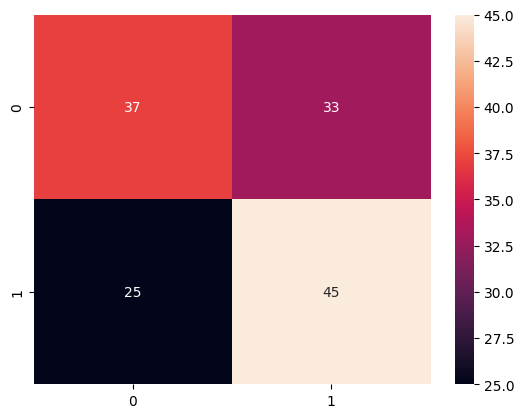

In [33]:
# Confusion Matrix
confusion = confusion_matrix(labels_e, pred_e)

import seaborn as sns

sns.heatmap(confusion, annot=True)

In [34]:
# Resetting the model for augmented dataset

model = ResNetForImageClassification(config)
model.apply(weights)
model.to(dev)

op = optim.Adam(model.parameters(), lr=0.001)

In [35]:
 # Running the model for the augmented dataset for 10 epochs

for epoch in range(10):
    model.train()
    t_loss = 0.0

    for i, l in augmented_loader:
        i, l = i.to(dev), l.to(dev)
        op.zero_grad()

        o = model(i).logits
        loss_ = loss(o, l)
        loss_.backward()

        op.step()

        t_loss += loss_.item() / len(train_loader)
    
    print(f"Epoch: {epoch+1}, Loss: {t_loss}")


Epoch: 1, Loss: 3.4550319214661913
Epoch: 2, Loss: 2.0080912427769766
Epoch: 3, Loss: 1.930549013945792
Epoch: 4, Loss: 1.9528427239921364
Epoch: 5, Loss: 1.8812274154689577
Epoch: 6, Loss: 1.7800953454441497
Epoch: 7, Loss: 1.7293113089270062
Epoch: 8, Loss: 2.073966332607799
Epoch: 9, Loss: 1.6005159798595634
Epoch: 10, Loss: 1.4927118122577674


In [39]:
# Evaluation

model.eval()
acc = 0

labels_e = []
pred_e = []

with torch.no_grad():
    for i, l in test_loader:
        i, l = i.to(dev), l.to(dev)
        o = model(i).logits 
        
        _, pred = torch.max(o, 1)
        acc += torch.sum(pred == l).item()


        labels_e.extend(l.cpu().numpy())
        pred_e.extend(pred.cpu().numpy())

print(f"Accuracy: {acc/len(test_data)}")

Accuracy: 0.6071428571428571


In [40]:
# Metrics

accuracy = accuracy_score(labels_e, pred_e)
precision = precision_score(labels_e, pred_e)
recall = recall_score(labels_e, pred_e)
f1 = f1_score(labels_e, pred_e)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.6071428571428571
Precision: 0.5688073394495413
Recall: 0.8857142857142857
F1 Score: 0.6927374301675978


<Axes: >

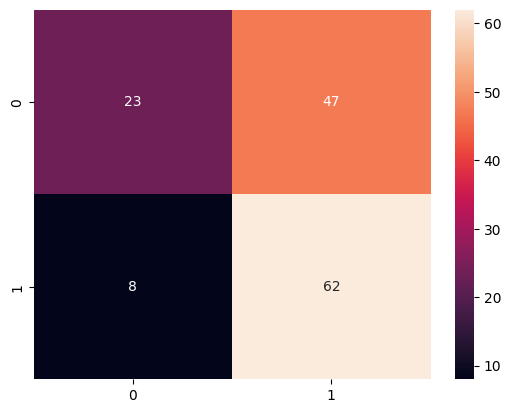

In [41]:
# Confusion Matrix
confusion = confusion_matrix(labels_e, pred_e)

import seaborn as sns

sns.heatmap(confusion, annot=True)

### Inferences:

| Metrics | Original | Augmented |
| -------- | -------- | -------- |
| Accuracy | 0.59 | 0.61 |
| Precision | 0.58 | 0.57 |
| Recall | 0.64 | 0.89 |
| F1 Score | 0.61 | 0.69 |


We have used a pretrained resnet-50 model which is fine-tuned based on the given train data. </br>

We ran both the models for 10 epochs on the train data (obtained from the train data from the dataset) and the augmented data (obtained by random set of three augmentations from the train data). </br>

It can be observed that while there isn't a significant increase in accuracy, it can be observed that there is a significant increase in the recall, indicating that the model has improved in identifying the true positives. Therefore, using more training data shows the usage of augmentations. 
</br>


References:

https://pytorch.org/vision/main/models/generated/torchvision.models.resnet50.html